<a href="https://colab.research.google.com/github/raulbenitez/IWANN21/blob/main/MNIST_Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Traditional Machine Learning approach:

Use PCA to extract features and a simple supervised classifier to classify images

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


PCA to explain 95% of the variance in the training set:

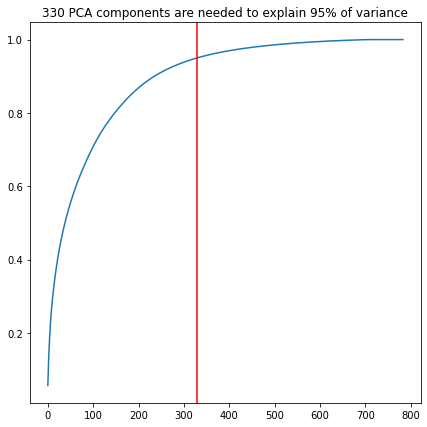

IndexError: ignored

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Reshape as NOBSERVATIONS x NPIXELS:
train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


# Scale (Standardization)
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)

pca_full = PCA(n_components=test.shape[1])
pca_full.fit(train)

cummulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Find number of components needed to explain 95% of variance:
ind= np.argwhere(cummulative_variance>0.95)
Ncomponents_95 = ind[0].item()

fig = plt.figure(figsize=(7,7))
plt.plot(cummulative_variance)
plt.axvline(Ncomponents_95,c='r')
plt.title('{} PCA components are needed to explain 95% of variance'.format(Ncomponents_95))
plt.show()

# GET PCA FEATURES PROJECTING TO THE PCA SPACE:
pca95 = PCA(n_components=Ncomponents_95)
pca_train = pca95.fit_transform(train)
pca_test = pca95.fit_transform(test)

print('The PCA training set has dimensions {} {}'.format(*pca_train.shape))

# Fit a kNN classifier using PCA features:

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(pca_train,y_train)

y_test_pred = knn.predict(pca_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: ignored

In [15]:
confusion_matrix(y_test, y_test_pred)

array([[ 741,   11,   14,   50,   32,   57,   15,    5,   24,   31],
       [  11, 1097,    2,    3,    8,    4,    2,    3,    2,    3],
       [ 122,  151,  295,   53,  195,   15,   98,   10,   82,   11],
       [ 104,  116,  100,  403,   13,  113,    7,    8,  143,    3],
       [  33,   45,   28,   16,  556,   14,   11,   65,   71,  143],
       [  77,  102,   53,  204,   49,  182,   11,   91,  104,   19],
       [ 141,   33,   56,   15,   92,   39,  561,    4,   14,    3],
       [   3,  134,   38,   95,  126,   13,    3,  487,   33,   96],
       [  48,   43,   64,  315,  122,   59,    3,   33,  195,   92],
       [  12,   21,   28,   24,  415,   76,    1,  225,   31,  176]])

In [17]:
from sklearn.metrics import classification_report

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
print(classification_report(y_test, y_test_pred, target_names=label_names))

              precision    recall  f1-score   support

        zero       0.57      0.76      0.65       980
         one       0.63      0.97      0.76      1135
         two       0.44      0.29      0.35      1032
       three       0.34      0.40      0.37      1010
        four       0.35      0.57      0.43       982
        five       0.32      0.20      0.25       892
         six       0.79      0.59      0.67       958
       seven       0.52      0.47      0.50      1028
       eight       0.28      0.20      0.23       974
        nine       0.31      0.17      0.22      1009

    accuracy                           0.47     10000
   macro avg       0.45      0.46      0.44     10000
weighted avg       0.46      0.47      0.45     10000

